## Importing Libraries

In [1]:
from sentinelhub import SHConfig,MimeType,CRS,BBox,SentinelHubRequest,DataCollection 
import utils
from utils import plot_image
import requests
import datetime
import os
from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

## Credentials

In [2]:
config=SHConfig()
config.sh_client_id="--CLIENT_ID--"
config.sh_client_secret="--CLIENT_SECRET--"
# you can get client-id and client-secret token from your SentinelHub Account.

 ## Send the request

In [3]:
evalscript = """
//VERSION=3

//Basic initialization setup function
function setup() {
  return {
	//List of all bands, that will be used in the script, either for visualization or for choosing best pixel
    input: [{
      bands: [
         "B04",
         "B08"
      ]
    }],
	//This can always be the same if one is doing RGB images
    output: { bands: 3 },
    mosaicking: "ORBIT"
  }
}

/*
In this function we limit the scenes, which are used for processing. 
These are based also on input variables, coming from Playground. 
E.g. if one sets date "2017-03-01" ("TO date") and cloud coverage filter 30%, 
all scenes older than 2017-03-01 with cloud coverage 30% will be checked against
further conditions in this function.
The more scenes there are, longer it will take to process the data.
After 60 seconds of processing, there will be a timeout.
*/

function preProcessScenes (collections) {
    collections.scenes.orbits = collections.scenes.orbits.filter(function (orbit) {
        var orbitDateFrom = new Date(orbit.dateFrom)
        return orbitDateFrom.getTime() >= (collections.to.getTime()-3*31*24*3600*1000);
    })
    return collections
}

function calcNDVI(sample) {
  var denom = sample.B04+sample.B08;
  return ((denom!=0) ? (sample.B08-sample.B04) / denom : 0.0);
}
function evaluatePixel(samples) {  
  var max = 0;
  for (var i=0;i<samples.length;i++) {
      var ndvi = calcNDVI(samples[i]);
    max = ndvi > max ? ndvi:max;
  }
if (max<-1.1) return [0,0,0];
else if (max<-0.2) return [0.75,0.75,0.75];
else if (max<-0.1) return [0.86,0.86,0.86];
else if (max<0) return [1,1,0.88];
else if (max<0.025) return [1,0.98,0.8];
else if (max<0.05) return [0.93,0.91,0.71];
else if (max<0.075) return [0.87,0.85,0.61];
else if (max<0.1) return [0.8,0.78,0.51];
else if (max<0.125) return [0.74,0.72,0.42];
else if (max<0.15) return [0.69,0.76,0.38];
else if (max<0.175) return [0.64,0.8,0.35];
else if (max<0.2) return [0.57,0.75,0.32];
else if (max<0.25) return [0.5,0.7,0.28];
else if (max<0.3) return [0.44,0.64,0.25];
else if (max<0.35) return [0.38,0.59,0.21];
else if (max<0.4) return [0.31,0.54,0.18];
else if (max<0.45) return [0.25,0.49,0.14];
else if (max<0.5) return [0.19,0.43,0.11];
else if (max<0.55) return [0.13,0.38,0.07];
else if (max<0.6) return [0.06,0.33,0.04];
else return [0,0.27,0];

}
"""
bbox = BBox(bbox=[77.269072, 28.467484, 77.331213, 28.494945], crs=CRS.WGS84)

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,          
            time_interval=('2021-09-02', '2022-09-01'),          
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.JPG),
    ],
    bbox=bbox,
    size=[512, 257.381],
    data_folder="Delhi",
    config=config
)

response = request.get_data()    

## Image NVID

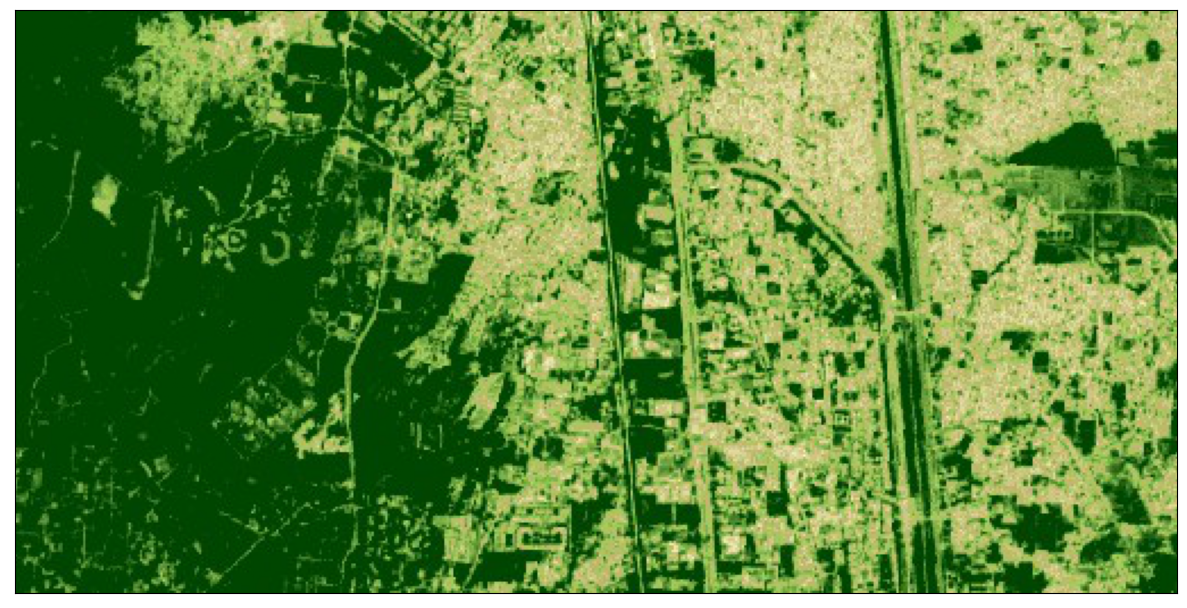

In [4]:
image=response[0]
plot_image(image,factor=1/255,clip_range=(0,1))

## Download Image and print the directory

In [5]:
%%time
all_bands_img = request.get_data(save_data=True)

Wall time: 6.25 s


In [6]:
#Creating a folder name mention in function 
print(
    "The output directory has been created and a png file: \n"
)

for folder, _, filenames in os.walk(request.data_folder):
    for filename in filenames:
        print(os.path.join(folder, filename))

The output directory has been created and a png file: 

Delhi\de3efd5f89b5e7012828b7bf0df66ee5\request.json
Delhi\de3efd5f89b5e7012828b7bf0df66ee5\response.jpg


In [ ]:
# 77.092438,28.489212,77.472839,28.592963

In [7]:
evalscript = """
//VERSION=3

//Basic initialization setup function
function setup() {
  return {
	//List of all bands, that will be used in the script, either for visualization or for choosing best pixel
    input: [{
      bands: [
         "B04",
         "B08"
      ]
    }],
	//This can always be the same if one is doing RGB images
    output: { bands: 3 },
    mosaicking: "ORBIT"
  }
}

/*
In this function we limit the scenes, which are used for processing. 
These are based also on input variables, coming from Playground. 
E.g. if one sets date "2017-03-01" ("TO date") and cloud coverage filter 30%, 
all scenes older than 2017-03-01 with cloud coverage 30% will be checked against
further conditions in this function.
The more scenes there are, longer it will take to process the data.
After 60 seconds of processing, there will be a timeout.
*/

function preProcessScenes (collections) {
    collections.scenes.orbits = collections.scenes.orbits.filter(function (orbit) {
        var orbitDateFrom = new Date(orbit.dateFrom)
        return orbitDateFrom.getTime() >= (collections.to.getTime()-3*31*24*3600*1000);
    })
    return collections
}

function calcNDVI(sample) {
  var denom = sample.B04+sample.B08;
  return ((denom!=0) ? (sample.B08-sample.B04) / denom : 0.0);
}
function evaluatePixel(samples) {  
  var max = 0;
  for (var i=0;i<samples.length;i++) {
      var ndvi = calcNDVI(samples[i]);
    max = ndvi > max ? ndvi:max;
  }
if (max<-1.1) return [0,0,0];
else if (max<-0.2) return [0.75,0.75,0.75];
else if (max<-0.1) return [0.86,0.86,0.86];
else if (max<0) return [1,1,0.88];
else if (max<0.025) return [1,0.98,0.8];
else if (max<0.05) return [0.93,0.91,0.71];
else if (max<0.075) return [0.87,0.85,0.61];
else if (max<0.1) return [0.8,0.78,0.51];
else if (max<0.125) return [0.74,0.72,0.42];
else if (max<0.15) return [0.69,0.76,0.38];
else if (max<0.175) return [0.64,0.8,0.35];
else if (max<0.2) return [0.57,0.75,0.32];
else if (max<0.25) return [0.5,0.7,0.28];
else if (max<0.3) return [0.44,0.64,0.25];
else if (max<0.35) return [0.38,0.59,0.21];
else if (max<0.4) return [0.31,0.54,0.18];
else if (max<0.45) return [0.25,0.49,0.14];
else if (max<0.5) return [0.19,0.43,0.11];
else if (max<0.55) return [0.13,0.38,0.07];
else if (max<0.6) return [0.06,0.33,0.04];
else return [0,0.27,0];

}
"""
bbox = BBox(bbox=[77.092438,28.489212,77.472839,28.592963], crs=CRS.WGS84)

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,          
            time_interval=('2021-09-02', '2022-09-01'),          
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.JPG),
    ],
    bbox=bbox,
    size=[512, 257.381],
    data_folder="Delhi",
    config=config
)

response = request.get_data()    

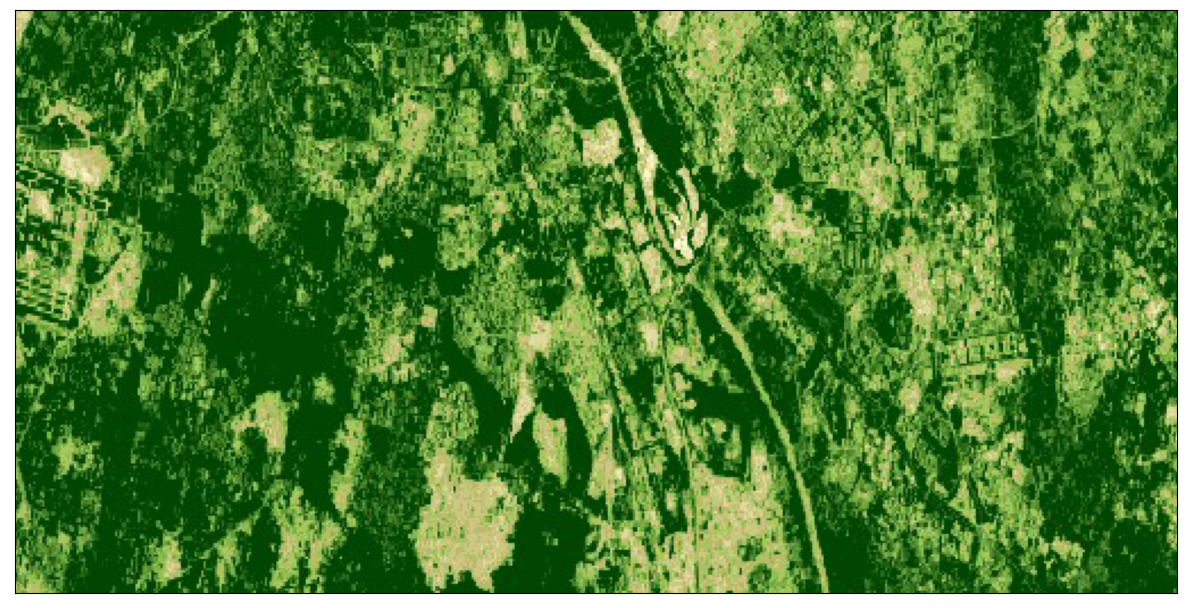

In [8]:
image=response[0]
plot_image(image,factor=1/255,clip_range=(0,1))

## Important LINKS

In [ ]:
'''

"http://bboxfinder.com/#0.000000,0.000000,0.000000,0.000000" for coordinates
"https://sentinelhub-py.readthedocs.io/en/latest/configure.html" for docs
"https://apps.sentinel-hub.com/dashboard/#/account/settings" for credentials
'''